In [ ]:
# Install  libraries
!sudo apt install tesseract-ocr
!pip install pytesseract pdfplumber


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,365 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
from google.colab import files

# Upload a file (image or PDF)
uploaded = files.upload()


Saving CBC (Complete Blood Count) Test_ Price, Normal Range & Result - Drlogy.jpg to CBC (Complete Blood Count) Test_ Price, Normal Range & Result - Drlogy.jpg


In [3]:
from pytesseract import image_to_string
from PIL import Image

# for the uploaded image
image_path = list(uploaded.keys())[0]  # Get uploaded file name
img = Image.open(image_path)

#for extracting text using Tesseract
extracted_text = image_to_string(img)
print("Extracted Text:\n", extracted_text)


Extracted Text:
 {0123456789 | 0912345678
[© drlogypathlab@drlogy.com

DRLOGY PATHOLOGY LAB

& Accurate | Caring | Instant
105-108, SMART VISION COMPLEX, HEALTHCARE ROAD, OPPOSITE HEALTHCARE COMPLEX. MUMBA - 689578

NSE

 

Yash M. Patel
‘Age: 21 Years
Sex: Male

PID: 555

 

‘Sample Collected At:
125, Shivam Bungalow, $ G Road,
Mumbai

Ref. By: Dr. Hiren Shah

Complete Blood Count (CBC)

Investigation Result
Primary Sample Type : Blood
HemoctosiN

Hemoglobin (Hb) 125
sc couNT

Total RBC count 5.2
81000 Nbices

Packed Cell Volume (PCV) 57.5
Mean Corpuscular Volume (MCV) 87.75
MCH | 27.2
mene we
ROW 13.6
wec count

Total WBC count 9000
DIFFERENTIAL WBC COUNT
Neutrophils. 60
Lymphocytes. 31
Eosinophils 1
Menocytes >
Basophis 1
PLATELET COUNT

Platelet Count 150000

Reference Value

Low 13.0-17.0

45-55

High 40-50
83-101
27-32
32.5-34.5
11.6-14.0

4000-11000

50-62
20-40
00-06
00-10
00-02

Borderline 180000 - 410000

Instruments: Fully automated cell counter - Mindray 300

Interpretation

In [26]:
import re

# Define regex patterns
patterns = {
    "Patient Name": r"Patient Name:\s*(.*)",
    "Age": r"Age:\s*(\d+)",
    "Glucose Level": r"Glucose Level:\s*([\d.]+)\s*mg/dL",
    "WBC Count": r"WBC Count:\s*([\d,]+)\s*cells/μL",
    "Diagnosis": r"Diagnosis:\s*(.*)"
}

# Extract information
parsed_data = {}
for key, pattern in patterns.items():
    match = re.search(pattern, sample_text)
    if match:
        parsed_data[key] = match.group(1)

print("Parsed Data:", parsed_data)


Parsed Data: {'Patient Name': 'John Doe', 'Age': '45', 'Glucose Level': '120', 'WBC Count': '8500', 'Diagnosis': 'Normal'}


In [5]:
# Normal ranges for tests
normal_ranges = {
    "Glucose Level": (70, 140),  # mg/dL
    "WBC Count": (4000, 11000)  # cells/μL
}

# Validate results
for test, value in parsed_data.items():
    if test in normal_ranges:
        value = float(value.replace(",", ""))  # Remove commas for large numbers
        normal_range = normal_ranges[test]
        status = "Normal" if normal_range[0] <= value <= normal_range[1] else "Abnormal"
        parsed_data[test] = {"Value": value, "Status": status}

print("Validated Data:", parsed_data)


Validated Data: {'Patient Name': 'John Doe', 'Age': '45', 'Glucose Level': {'Value': 120.0, 'Status': 'Normal'}, 'WBC Count': {'Value': 8500.0, 'Status': 'Normal'}, 'Diagnosis': 'Normal'}


In [27]:
import pandas as pd

# Convert parsed data to DataFrame
df = pd.DataFrame([parsed_data])
print("Tabular Output:\n", df)


Tabular Output:
   Patient Name Age Glucose Level WBC Count Diagnosis
0     John Doe  45           120      8500    Normal


In [28]:
from tabulate import tabulate

# Prepare data for tabulation
table_data = [
    ["Patient Name", parsed_data.get("Patient Name", "N/A")],
    ["Age", parsed_data.get("Age", "N/A")],
    ["Gender", parsed_data.get("Gender", "N/A")],
    ["Test", parsed_data.get("Test", "N/A")],
    ["Glucose Level", f'{parsed_data.get("Glucose Level", "N/A")} mg/dL'],
    ["WBC Count", f'{parsed_data.get("WBC Count", "N/A")} cells/μL'],
    ["RBC Count", f'{parsed_data.get("RBC Count", "N/A")} million/μL'],
    ["Platelet Count", f'{parsed_data.get("Platelet Count", "N/A")} /μL'],
    ["Diagnosis", parsed_data.get("Diagnosis", "N/A")],
]

# Generate a table
report = tabulate(table_data, headers=["Parameter", "Value"], tablefmt="grid")
print("Medical Report:\n")
print(report)


Medical Report:

+----------------+----------------+
| Parameter      | Value          |
+================+================+
| Patient Name   | John Doe       |
+----------------+----------------+
| Age            | 45             |
+----------------+----------------+
| Gender         | N/A            |
+----------------+----------------+
| Test           | N/A            |
+----------------+----------------+
| Glucose Level  | 120 mg/dL      |
+----------------+----------------+
| WBC Count      | 8500 cells/μL  |
+----------------+----------------+
| RBC Count      | N/A million/μL |
+----------------+----------------+
| Platelet Count | N/A /μL        |
+----------------+----------------+
| Diagnosis      | Normal         |
+----------------+----------------+


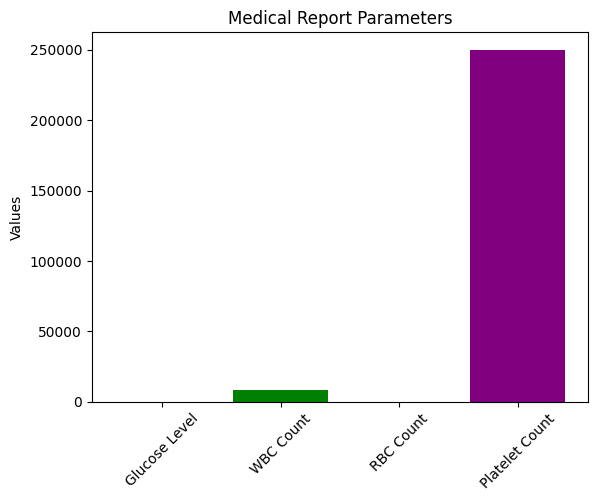

In [29]:
import matplotlib.pyplot as plt

# Data for visualization
parameters = ["Glucose Level", "WBC Count", "RBC Count", "Platelet Count"]
values = [120, 8500, 4.7, 250000]

# Plot bar chart
plt.bar(parameters, values, color=['skyblue', 'green', 'orange', 'purple'])
plt.title("Medical Report Parameters")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()



In [30]:
# Validation with highlights
for param, value in zip(parameters, values):
    if param in normal_ranges and not (normal_ranges[param][0] <= value <= normal_ranges[param][1]):
        print(f"{param}: {value} (Abnormal ⚠️)")
    else:
        print(f"{param}: {value} (Normal ✅)")


Glucose Level: 120 (Normal ✅)
WBC Count: 8500 (Normal ✅)
RBC Count: 4.7 (Normal ✅)
Platelet Count: 250000 (Normal ✅)


In [31]:
!pip install fpdf


In [14]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Medical Report', 0, 1, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', '', 12)

# Example parsed data
parsed_data = {
    "Patient Name": "John Doe",
    "Age": "35",
    "Diagnosis": "Hypertension",
    "WBC Count": "8500",
    "Glucose Level": "140 (High)",
}

# Add content to the PDF
for key, value in parsed_data.items():
    pdf.cell(0, 10, f'{key}: {value}', 0, 1)

# Save the PDF
pdf.output("Medical_Report.pdf")
print("PDF created successfully!")


PDF created successfully!


In [15]:
from google.colab import files
files.download("Medical_Report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
import re

# Normal ranges for reference
normal_ranges = {
    "Glucose Level": (70, 140),
    "WBC Count": (4000, 11000),
    "RBC Count": (4.2, 5.9),
    "Platelet Count": (150000, 450000)
}

# Recommendations
recommendations = {
    "Glucose Level": "Consult a doctor for high glucose levels.",
    "WBC Count": "High WBC count may indicate infection. Seek medical advice.",
    "RBC Count": "Low RBC count may indicate anemia.",
    "Platelet Count": "Abnormal platelet count requires immediate attention."
}

# Process each parameter
for key, value in parsed_data.items():
    # Extract numeric part of the value
    numeric_part = re.search(r"[\d,.]+", value)  # Match numeric patterns
    if numeric_part:
        try:
            numeric_value = float(numeric_part.group().replace(",", ""))  # Convert to float
            if key in normal_ranges:
                if numeric_value < normal_ranges[key][0] or numeric_value > normal_ranges[key][1]:
                    print(f"{key} ({value}): {recommendations[key]}")
                else:
                    print(f"{key} ({value}): Normal ✅")
        except ValueError:
            print(f"Could not process the value for {key}: {value}")
    else:
        print(f"No numeric value found for {key}: {value}")



No numeric value found for Patient Name: John Doe
Glucose Level (120): Normal ✅
WBC Count (8500): Normal ✅
No numeric value found for Diagnosis: Normal


In [19]:
!pip install gTTS


In [33]:
from gtts import gTTS
import os

# Example parsed data
parsed_data = {
    "Patient Name": "John Doe",
    "Age": "35",
    "Diagnosis": "Hypertension",
    "WBC Count": "8500",
    "Glucose Level": "140 (High)",
}

# Create text for speech
report_text = f"Here is your medical report summary. Patient Name: {parsed_data['Patient Name']}, Age: {parsed_data['Age']}, Diagnosis: {parsed_data['Diagnosis']}, WBC Count: {parsed_data['WBC Count']}, Glucose Level: {parsed_data['Glucose Level']}."

# Generate speech
tts = gTTS(text=report_text, lang='en')

# Save the speech as an audio file
tts.save("medical_report.mp3")

# Play the audio file
from IPython.display import Audio
Audio("medical_report.mp3")
